In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/davidrendon/Documents/supervi/GMMHMM'

In [2]:
d = pd.read_csv("data.csv")
d.head()

,Unnamed: 0,Lugar,Grabadora,Transformación,Permanencia,Longitud,ACIft,ADI,ACItf,BI,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,20160101,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.171947,0.584782,-0.475717,-0.860168,...,0.206630,0.260610,-0.326033,0.486937,0.232333,0.149117,-0.372678,-1.039871,-0.914863,-0.200129
1,20160102,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.304241,0.874729,-0.565690,-0.375552,...,0.350874,0.122914,-0.517690,0.421486,0.152173,0.262447,0.029164,-0.745587,-0.942384,-0.068598
2,20160103,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.339822,0.746814,-0.458379,-0.135205,...,0.290717,0.507416,-0.391097,0.740404,0.132742,0.167833,0.237685,-0.404005,-0.543876,0.101897
3,20160104,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.229584,0.918072,-0.325400,-0.110043,...,0.350568,0.274446,-0.362861,0.131288,-0.111861,0.054663,-0.090833,-0.648560,-0.544687,0.117638
4,20160105,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.308185,0.817189,-0.322157,-0.138337,...,0.240093,0.233373,-0.323291,0.180075,-0.131029,-0.073313,-0.177323,-0.836910,-0.718013,0.046863


In [3]:
d.describe()

,Unnamed: 0,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
count,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.015974e+07,-0.388149,0.705935,-0.382888,0.297768,0.588092,0.518360,-0.238546,-0.175725,-0.391602,...,0.272222,-0.170470,-0.530227,-0.031110,-0.026964,-0.105272,-0.086363,0.184053,0.328159,0.379578
std,6.104042e+03,0.417588,0.512098,0.381946,0.543745,0.379267,0.591759,0.723389,1.183857,0.662391,...,0.652869,0.754506,0.499294,0.468836,0.472345,0.638377,0.593284,0.761811,0.852762,0.726520
min,2.015121e+07,-1.292961,-0.499247,-0.804848,-0.860168,-0.590470,-1.110190,-1.233281,-0.902169,-1.249019,...,-3.005511,-3.574186,-2.210150,-1.787838,-1.685194,-1.990108,-2.205776,-2.595717,-3.016703,-3.061579
25%,2.015788e+07,-0.635036,0.522479,-0.648515,-0.111244,0.435768,0.101551,-0.823806,-0.787586,-1.153784,...,0.071781,-0.456821,-0.756196,-0.239197,-0.231715,-0.520063,-0.382280,-0.311140,-0.177813,0.124875
50%,2.016011e+07,-0.344028,0.683260,-0.528473,0.293334,0.773082,0.686528,-0.461281,-0.578829,0.144902,...,0.341794,-0.093681,-0.483029,0.062746,0.032930,0.001001,0.052389,0.388797,0.680284,0.551354
75%,2.016122e+07,-0.195007,1.128980,-0.157816,0.457668,0.895362,0.932064,0.203549,0.131070,0.159570,...,0.722134,0.278338,-0.206076,0.290927,0.196751,0.266408,0.262801,0.623187,0.887522,0.871470
max,2.017011e+07,0.420727,1.724052,1.022881,1.749338,0.908549,1.317390,1.202985,6.812309,0.194823,...,0.974399,0.743859,0.293253,0.740404,0.942343,0.957945,1.003752,1.106136,1.175312,1.146806


In [4]:
y=d["Transformación"]  ## this is the label 


In [5]:
xw=d.iloc[:,6:] #x without transformation
listnames=list(xw.columns)  ##Columns names

In [6]:
x= StandardScaler().fit_transform(xw.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=xw.index,columns=xw.columns) #so we need to transform it 
scalx.head()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.523219,-0.239086,-0.245615,-2.152095,-0.811262,-1.197414,-0.815941,-0.620119,-1.270065,-0.373432,...,-0.101531,0.577387,0.413293,1.116656,0.554766,0.402710,-0.487699,-1.623598,-1.473068,-0.806367
1,0.203063,0.333100,-0.483674,-1.251407,-0.377305,-1.540880,0.348223,-0.497861,-1.308126,0.395350,...,0.121745,0.392958,0.025376,0.975575,0.383263,0.582117,0.196787,-1.233215,-1.505682,-0.623409
2,0.116954,0.080670,-0.199741,-0.804707,-0.398314,-0.868588,0.448786,-0.452648,-1.296725,-0.130841,...,0.028629,0.907958,0.281602,1.663007,0.341690,0.432339,0.551974,-0.780088,-1.033422,-0.386251
3,0.383735,0.418634,0.152106,-0.757943,-0.317457,-1.021832,0.633898,-0.329021,-1.298846,0.341593,...,0.121272,0.595919,0.338753,0.350050,-0.181637,0.253185,-0.007614,-1.104504,-1.034384,-0.364356
4,0.193518,0.219550,0.160686,-0.810528,-0.329051,-1.588328,0.612182,-0.363019,-1.286741,0.814384,...,-0.049734,0.540905,0.418843,0.455211,-0.222647,0.050593,-0.154937,-1.354359,-1.239787,-0.462803


,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.523219,-0.239086,-0.245615,-2.152095,-0.811262,-1.197414,-0.815941,-0.620119,-1.270065,-0.373432,...,-0.101531,0.577387,0.413293,1.116656,0.554766,0.402710,-0.487699,-1.623598,-1.473068,-0.806367
1,0.203063,0.333100,-0.483674,-1.251407,-0.377305,-1.540880,0.348223,-0.497861,-1.308126,0.395350,...,0.121745,0.392958,0.025376,0.975575,0.383263,0.582117,0.196787,-1.233215,-1.505682,-0.623409
2,0.116954,0.080670,-0.199741,-0.804707,-0.398314,-0.868588,0.448786,-0.452648,-1.296725,-0.130841,...,0.028629,0.907958,0.281602,1.663007,0.341690,0.432339,0.551974,-0.780088,-1.033422,-0.386251
3,0.383735,0.418634,0.152106,-0.757943,-0.317457,-1.021832,0.633898,-0.329021,-1.298846,0.341593,...,0.121272,0.595919,0.338753,0.350050,-0.181637,0.253185,-0.007614,-1.104504,-1.034384,-0.364356
4,0.193518,0.219550,0.160686,-0.810528,-0.329051,-1.588328,0.612182,-0.363019,-1.286741,0.814384,...,-0.049734,0.540905,0.418843,0.455211,-0.222647,0.050593,-0.154937,-1.354359,-1.239787,-0.462803


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(scalx)

principalDf = pd.DataFrame(data = principalComponents)


In [55]:
principalDf
finalDf = pd.concat([principalDf, d[['Transformación']]], axis = 1)

In [57]:
pca


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
pca.explained_variance_

array([11.51610099,  5.28101185,  3.43408708,  2.64243986,  1.39652992])

In [8]:
import pandas as pd
from sklearn import decomposition, preprocessing

df=xw

pca_data = preprocessing.scale(df)

pca = decomposition.PCA(n_components = 4)
pca.fit(pca_data)
transformed_pca = pca.transform(pca_data)

cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)  ##var acumulative

[0.4027207935982306, 0.5873990354792143, 0.7074898782226648, 0.7998966291832149]


/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [10]:
principalDf = pd.DataFrame(data = transformed_pca)
finalDf = pd.concat([principalDf, d[['Transformación']]], axis = 1) ###
pca.explained_variance_ratio_

array([0.40272079, 0.18467824, 0.12009084, 0.09240675])

In [11]:
from scipy import stats
kolmogorov=[]
for i in range(0,29):
 kolmogorov.append(stats.kstest(df.iloc[:,i], 'norm'))

In [36]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=4, random_state=0)
X_transformed = transformer.fit_transform(xw)

X_transformed;


In [38]:
principalf = pd.DataFrame(data = X_transformed)
finalf = pd.concat([principalf, d[['Transformación']]], axis = 1)
finalf=finalDf.rename(columns={'Transformación':'target'});


In [16]:
trans={'Alta':2,'Baja':0,'Media':1}
finalDf.target=[trans[item] for item in finalDf.target]

In [17]:
finalDf

,0,1,2,3,target
0,2.071398,-2.845799,-0.599833,-2.652458,2
1,1.175233,-3.059877,-0.067560,-1.446187,2
2,0.641879,-2.745272,-0.972382,-1.495440,2
3,1.368705,-2.293908,-0.300852,-1.186928,2
4,1.818713,-2.171256,-0.123771,-1.245864,2
5,2.054737,-2.078165,0.146765,-0.900913,2
6,0.934883,-2.607195,-0.344535,-0.700047,2
7,1.406530,-2.248986,0.114915,-1.053398,2
8,0.625237,-2.883781,-0.577321,-1.351426,2
9,1.320220,-2.634753,-0.083674,-0.990261,2


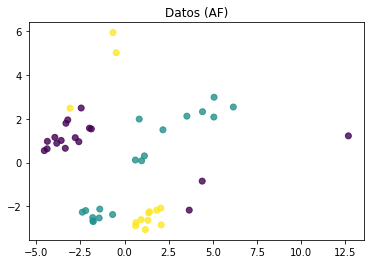

In [68]:

#grafica de datos con factor
features=finalDf
plt.title("Datos (AF)")
plt.scatter(features[0], features[1], alpha=0.8,
             c=finalDf.target,  cmap='viridis')          



accuracy: 0.5


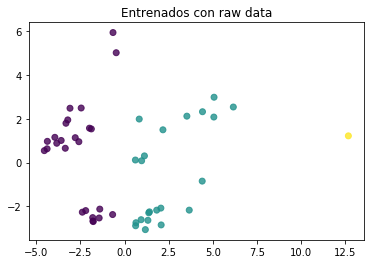

In [63]:
from sklearn.cluster import KMeans  ##training with standarized data
kmeans = KMeans(n_clusters=3)
kmeans.fit(xw)
y_kmeans = kmeans.predict(xw)

features=finalf
plt.scatter(features[0], features[1], alpha=0.8,
             c=y_kmeans,  cmap='viridis')   
plt.title("Entrenados con raw data")
from sklearn.metrics import accuracy_score
print ("accuracy:",accuracy_score(y_kmeans,finalDf.target))

accuracy: 0.6458333333333334


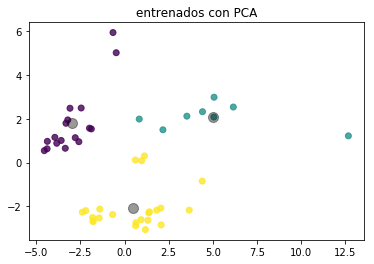

In [67]:
from sklearn.cluster import KMeans  ##training with PCA data
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

features=finalDf
plt.scatter(features[0], features[1], alpha=0.8,
             c=y_kmeans,  cmap='viridis')   

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.4);
plt.title("entrenados con PCA")

from sklearn.metrics import accuracy_score
print ("accuracy:",accuracy_score(y_kmeans,finalDf.target))

accuracy: 0.6875


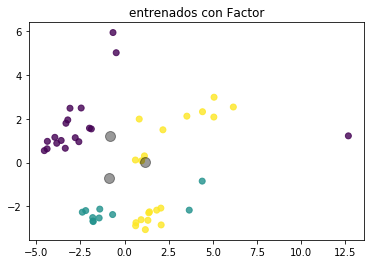

In [80]:
from sklearn.cluster import KMeans  ##training with Factor data
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalf)
y_kmeans = kmeans.predict(principalf)

features=finalDf
plt.scatter(features[0], features[1], alpha=0.8,
             c=y_kmeans,  cmap='viridis')   

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.4);
plt.title("entrenados con Factor")

from sklearn.metrics import accuracy_score
print ("accuracy:",accuracy_score(y_kmeans,finalDf.target))

accuracy: 0.7708333333333334


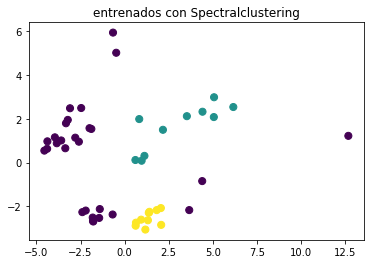

In [91]:

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(principalf)
plt.scatter(features[0], features[1], c=labels,
            s=50, cmap='viridis');

plt.title("entrenados con Spectralclustering")

print ("accuracy:",accuracy_score(labels,finalDf.target))


accuracy: 0.7916666666666666


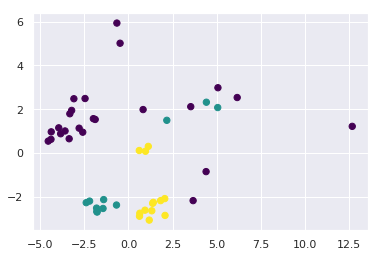

In [100]:


from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(principalf)
labels = gmm.predict(principalf)
features=finalf

plt.scatter(features[0], features[1], c=labels, s=40, cmap='viridis');

print ("accuracy:",accuracy_score(labels,finalDf.target))



,0,1,2,3
0,1.268759,-0.185645,1.171445,-0.804276
1,1.299430,-0.451683,1.166790,-1.232150
2,1.290297,-0.437257,0.638706,-1.032963
3,1.291800,-0.467374,0.792529,-0.935190
4,1.281622,-0.365489,1.012958,-0.924352
5,1.290510,-0.300233,0.661700,-0.714934
6,1.296842,-0.688926,0.311869,-0.929713
7,1.291608,-0.807669,0.576923,-0.738130
8,1.289504,-0.633148,0.605809,-1.153334
9,1.294273,-0.597526,0.624772,-0.908582
